## TAREA 05 

### *EJERCICIOS UNIDAD 02-B*

    MÉTODO DE NEWTON Y DE LA SECANTE

Nombre: Alegria Isabel Farinango Farinango

Fecha: 31/10/2025 

Link: https://github.com/Aizel-shadow/Metodos_Numericos-/blob/main/TAREAS/Tarea05.ipynb

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple

def biseccion(f: Callable[[float], float], a: float, b: float,
              tol: float=1e-6, max_iter: int=1000) -> float:
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError(f"No hay cambio de signo en [{a},{b}] (f(a)={fa}, f(b)={fb})")
    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        if abs(fc) < tol or (b - a) / 2 < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2

In [2]:
def newton(f: Callable[[float], float], df: Callable[[float], float],
           p0: float, tol: float=1e-6, max_iter: int=100) -> Tuple[float,int]:
    p = p0
    for i in range(1, max_iter+1):
        d = df(p)
        if d == 0:
            raise ZeroDivisionError(f"Derivada nula en iteración {i}, p = {p}")
        p_new = p - f(p)/d
        if abs(p_new - p) < tol:
            return p_new, i
        p = p_new
    return p, max_iter

In [3]:
def secante(f: Callable[[float], float], p0: float, p1: float,
            tol: float=1e-6, max_iter: int=100) -> Tuple[float,int]:
    q0, q1 = f(p0), f(p1)
    for i in range(1, max_iter+1):
        if q1 - q0 == 0:
            raise ZeroDivisionError(f"Denominador cero en secante en iter {i}")
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        if abs(p - p1) < tol:
            return p, i
        p0, p1, q0, q1 = p1, p, q1, f(p)
    return p1, max_iter

In [4]:
def find_roots_bruteforce(f, x_min, x_max, step=0.1, tol=1e-8):
    # devuelve intervalos [a,b] donde hay cambio de signo
    xs = np.arange(x_min, x_max+step/2, step)
    intervals = []
    for i in range(len(xs)-1):
        a, b = xs[i], xs[i+1]
        if f(a) == 0:
            intervals.append((a,a))
        elif f(a)*f(b) < 0:
            intervals.append((a,b))
    return intervals

In [5]:
# función de ayuda para graficar
def plot_functions(xs, ys_list, labels=None, ylim=None, title=None):
    for i, y in enumerate(ys_list):
        label = labels[i] if labels else None
        plt.plot(xs, y, label=label)
    plt.axhline(0,color='k',ls='--')
    if labels: plt.legend()
    if ylim: plt.ylim(ylim)
    if title: plt.title(title)
    plt.grid(True)
    plt.show()

#### *CONJUNTO DE EJERCICIOS*

Sea:
$$
f(x) = -x^3 - \cos(x)
$$

Con:
$$
x_0 = -1
$$

Use el método de Newton y el método de la secante para encontrar:
$$
x_2
$$

¿Se podría usar:
$$
x_0 = 0\ ?
$$

In [6]:
f = lambda x: -x**3 - math.cos(x)
df = lambda x: -3*x**2 + math.sin(x)

# Newton con p0 = -1 (calcular p1, p2)
p0 = -1.0
p1 = p0 - f(p0)/df(p0)
p2 = p1 - f(p1)/df(p1)
print("Newton: p0 =", p0, "p1 =", p1, "p2 =", p2)


Newton: p0 = -1.0 p1 = -0.880332899571582 p2 = -0.8656841631760818


In [7]:
# Secante: tomar p0=-1, p1=0 (explicación: necesitamos dos puntos iniciales)
p0s, p1s = -1.0, 0.0
p2_sec = p1s - f(p1s)*(p1s - p0s)/(f(p1s) - f(p0s))
print("Secante (p0=-1, p1=0): p2 =", p2_sec)

Secante (p0=-1, p1=0): p2 = -0.6850733573260451


In [8]:
# ¿se podría usar p0 = 0 en Newton?
print("f'(0) =", df(0), " → derivada en 0")
print("Respuesta: No, no es conveniente usar p0 = 0 porque f'(0)=0 (división por cero en Newton).")

f'(0) = 0.0  → derivada en 0
Respuesta: No, no es conveniente usar p0 = 0 porque f'(0)=0 (división por cero en Newton).


---

2. Encuentre soluciones precisas dentro de $10^{−4}$ para los siguientes problemas

a. 
$$
x^3 - 2x^2 - 5 = 0,\quad [1,4]
$$

In [9]:
tol = 1e-4

In [10]:
fa = lambda x: x**3 - 2*x**2 - 5
raiz_a = biseccion(fa, 1, 4, tol=tol)
print(" raíz ≈", raiz_a)

 raíz ≈ 2.690704345703125


---

b.
$$
x^3 + 3x^2 - 1 = 0,\quad [-3,-2]
$$

In [11]:
fb = lambda x: x**3 + 3*x**2 - 1
raiz_b = biseccion(fb, -3, -2, tol=tol)
print(" raíz ≈", raiz_b)

 raíz ≈ -2.87939453125


---

c.
$$
x - \cos(x) = 0,\quad [0,\frac{\pi}{2}]
$$

In [12]:
fc = lambda x: x - math.cos(x)
raiz_c = biseccion(fc, 0, math.pi/2, tol=tol)
print(" raíz ≈", raiz_c)

 raíz ≈ 0.7390911183631504


---

d.
$$
x - 0.8 - 0.2\sin(x) = 0,\quad [0,\frac{\pi}{2}]
$$

In [13]:
fd = lambda x: x - 0.8 - 0.2*math.sin(x)
raiz_d = biseccion(fd, 0, math.pi/2, tol=tol)
print(" raíz ≈", raiz_d)

 raíz ≈ 0.9642986727846112


---

3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^{−5}$ para los siguientes problemas

a. 

$$
3x - e^x = 0,\quad 1 \le x \le 2
$$

In [14]:
tol = 1e-5

In [15]:
fa = lambda x: 3*x - math.exp(x)
dfa = lambda x: 3 - math.exp(x)
# encuadramos (comprobar)
print("fa(1)=", fa(1), "fa(2)=", fa(2))
root_a_newton, it_n = newton(fa, dfa, 1.5, tol=tol)
root_a_sec, it_s = secante(fa, 1, 2, tol=tol)
print(" Newton:", root_a_newton, "iter:", it_n)
print(" Secante:", root_a_sec, "iter:", it_s)

fa(1)= 0.2817181715409549 fa(2)= -1.3890560989306504
 Newton: 1.5121345516578504 iter: 3
 Secante: 1.5121345517620621 iter: 9


---

b.

$$
2x + 3\cos(x) - e^x = 0,\quad 1 \le x \le 2
$$

In [16]:
fb = lambda x: 2*x + 3*math.cos(x) - math.exp(x)
dfb = lambda x: 2 - 3*math.sin(x) - math.exp(x)
print("fb(1)=", fb(1), "fb(2)=", fb(2))
root_b_newton, it_n2 = newton(fb, dfb, 1.5, tol=tol)
root_b_sec, it_s2 = secante(fb, 1, 2, tol=tol)
print(" Newton:", root_b_newton, "iter:", it_n2)
print(" Secante:", root_b_sec, "iter:", it_s2)

fb(1)= 0.9026250891453742 fb(2)= -4.637496608572078
 Newton: 1.2397146979752212 iter: 4
 Secante: 1.2397146979752531 iter: 6


---

4. El polinomio de cuarto grado

$$
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9
$$

Ceros reales en:
$$
[-1,0]\ \text{y}\ [0,1]
$$

Aproximar con precisión:
$$
10^{-6}
$$

a) Método de la secante (extremos como estimaciones iniciales)  

In [17]:
# función y derivada
f4 = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
df4 = lambda x: 920*x**3 + 54*x**2 + 18*x - 221

tol = 1e-6

In [18]:
# Cero en [-1,0]:
root_sec_left, itsl = secante(f4, -1.0, 0.0, tol=tol, max_iter=200)
root_new_left, itnl = newton(f4, df4, (-1.0+0.0)/2, tol=tol, max_iter=200)
print("4 left zero: secante:", root_sec_left, "iter:", itsl)
print("4 left zero: newton:", root_new_left, "iter:", itnl)

4 left zero: secante: -0.040659288315725135 iter: 4
4 left zero: newton: -0.04065928831575899 iter: 4


---

b) Método de Newton (punto medio como estimación inicial)

In [19]:
# Cero en [0,1]:
root_sec_right, itsr = secante(f4, 0.0, 1.0, tol=tol, max_iter=200)
root_new_right, itnr = newton(f4, (lambda x: 920*x**3 + 54*x**2 + 18*x - 221),
                              (0.0+1.0)/2, tol=tol, max_iter=200)
print("4 right zero: secante:", root_sec_right, "iter:", itsr)
print("4 right zero: newton:", root_new_right, "iter:", itnr)

4 right zero: secante: -0.04065928831557162 iter: 11
4 right zero: newton: -0.040659288315758865 iter: 6


---

5. La función 
$$
f(x) = \tan(\pi x) - 6,\ \text{cero en } \frac{1}{\pi}\arctan(6) \approx 0.447431543
$$

Sea:
$$
x_0 = 0,\ \quad x_1 = 0.48
$$

{Use 10 iteraciones en:}
\begin{aligned}
&\text{- Método de bisección} \\
&\text{- Método de Newton} \\
&\text{- Método de la secante} \\
&\text{¿Cuál método es más eficaz y por qué?}
\end{aligned}

¿Cuál método es más eficaz y por qué?

In [20]:
f5 = lambda x: math.tan(math.pi*x) - 6
# comprobar entorno de la raíz:
print("f5(0.4)=", f5(0.4), " f5(0.5) -> might be large (asymptote)")

f5(0.4)= -2.9223164628247473  f5(0.5) -> might be large (asymptote)


In [21]:
# Bisección (usar intervalo [0.42,0.48] asumiendo f(0.42)*f(0.48) < 0)
a,b = 0.42, 0.48
root_bis = biseccion(f5, a, b, tol=1e-6)
print(" Bisección:", root_bis)

 Bisección: 0.4474319458007812


In [22]:
# Newton: df = derivative of tan(pi x) is pi*sec^2(pi x)
df5 = lambda x: math.pi*(1/math.cos(math.pi*x))**2
try:
    root_new, it_new = newton(f5, df5, 0.48, tol=1e-8, max_iter=10)
    print(" Newton (10 its max):", root_new, "iter:", it_new)
except Exception as e:
    print(" Newton error:", e) 

 Newton (10 its max): 0.4474315432887466 iter: 7


In [23]:
# Secante (usar p0=0, p1=0.48, limitar a 10 iter)
try:
    root_sec, it_sec = secante(f5, 0.0, 0.48, tol=1e-8, max_iter=10)
    print(" Secante (10 its max):", root_sec, "iter:", it_sec)
except Exception as e:
    print(" Secante error:", e)

 Secante (10 its max): -2989.9400375314453 iter: 10


---

6.
$$
f(x) = \ln(x^2 + 1) - e^{0.4x}\cos(\pi x)
$$

a) Determine el único cero negativo con precisión:
$$
10^{-6}
$$

b) Determine los cuatro ceros positivos más pequeños con precisión:
$$
10^{-6}
$$

c) Encuentre una aproximación inicial para el enésimo cero positivo más pequeño.  
d) Determine el vigesimoquinto cero positivo más pequeño con precisión:
$$
10^{-6}
$$

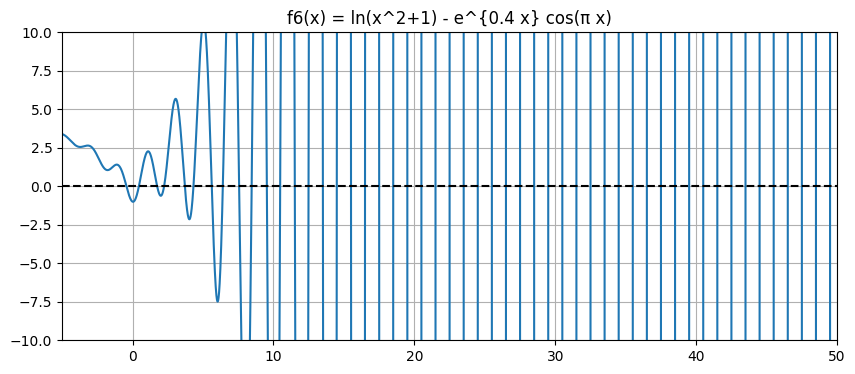

In [24]:
f6 = lambda x: math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x)

# Dibujo rápido en [ -5, 50 ] para ver ceros (ajusta según tiempo)
xs = np.linspace(-5, 50, 11000)  # paso ~0.005 -> detalle
ys = [f6(x) for x in xs]
plt.figure(figsize=(10,4))
plt.plot(xs, ys); plt.axhline(0, color='k', ls='--'); plt.ylim(-10, 10)
plt.xlim(-5, 50)
plt.title("f6(x) = ln(x^2+1) - e^{0.4 x} cos(π x)")
plt.grid(True)
plt.show()

In [25]:
# Encontrar intervalos con cambio de signo (más rústico y rápido con step=0.1)
intervals = find_roots_bruteforce(f6, -5, 50, step=0.1)
print("Posibles intervalos con cambio de signo (muestra primeros 30):", intervals[:30])

Posibles intervalos con cambio de signo (muestra primeros 30): [(np.float64(-0.500000000000016), np.float64(-0.40000000000001634)), (np.float64(0.3999999999999808), np.float64(0.49999999999998046)), (np.float64(1.6999999999999762), np.float64(1.7999999999999758)), (np.float64(2.1999999999999744), np.float64(2.299999999999974)), (np.float64(3.699999999999969), np.float64(3.7999999999999687)), (np.float64(4.299999999999967), np.float64(4.399999999999967)), (np.float64(5.599999999999962), np.float64(5.699999999999962)), (np.float64(6.3999999999999595), np.float64(6.499999999999959)), (np.float64(7.499999999999956), np.float64(7.599999999999955)), (np.float64(8.399999999999952), np.float64(8.499999999999952)), (np.float64(9.499999999999948), np.float64(9.599999999999948)), (np.float64(10.399999999999945), np.float64(10.499999999999945)), (np.float64(11.499999999999943), np.float64(11.599999999999941)), (np.float64(12.399999999999938), np.float64(12.499999999999936)), (np.float64(13.4999999

In [26]:
# a) único cero negativo: buscar intervalos en (-5,0)
neg_intervals = [it for it in intervals if it[1] <= 0]
neg_intervals

[(np.float64(-0.500000000000016), np.float64(-0.40000000000001634))]

---

7.  
$$
f(x) = x^{1/3}
$$

Raíz en:
$$
x = 0
$$

Usando:
$$
\text{Inicio: } x = 1,\ x_0 = 5,\ x_1 = 0.5
$$

Compare resultados de:
- Método de Newton
- Método de la secante

In [27]:
f7 = lambda x: np.sign(x)*abs(x)**(1/3)  # usando signo para raíz real
df7 = lambda x: (1/3)*np.sign(x)*abs(x)**(-2/3) if x!=0 else float('inf')

In [28]:
# Newton con x0 = 1 (puede divergir o dar oscilaciones)
try:
    root_new7, it_new7 = newton(f7, df7, 1.0, tol=1e-8, max_iter=50)
    print(" Newton:", root_new7, "iter", it_new7)
except Exception as e:
    print(" Newton error:", e)

 Newton: -6.338253001140714e+29 iter 50


In [29]:
# Secante con p0 = 5, p1 = 0.5
try:
    root_sec7, it_sec7 = secante(f7, 5.0, 0.5, tol=1e-8, max_iter=50)
    print(" Secante:", root_sec7, "iter", it_sec7)
except Exception as e:
    print(" Secante error:", e)

 Secante: -0.8203606203010692 iter 50


In [30]:
print("")
print ("Newton es inestable debido a derivada no definida/inf en 0; puede converger muy lento o fallar.")
print("")
print("Secante a veces evita la deriva de la derivada y puede converger mejor.")


Newton es inestable debido a derivada no definida/inf en 0; puede converger muy lento o fallar.

Secante a veces evita la deriva de la derivada y puede converger mejor.
